## **Name: Mubanga Nsofu** <br>
## **Course: BAN6440, Week 3**<br>
## **Email: mnsofu@learner.nexford.org** <br>
## **Leaner Id: 149050** <br>
## **Institution: Nexford University**<br>
## **Lecturer: Professor Bucciarelli** <br>
## **Date: 22nd November, 2024** <br>
## **Task: Milestone One Assignment**

### ----------------------------------------------
### **Step 1: Install & Load Python Libraries**
### ----------------------------------------------

In [17]:
# Install necessary libraries if not already installed
# Uncomment and run the below commands in Jupyter Notebook or your Python environment as needed:
# !pip install pandas numpy scikit-learn matplotlib re unittest tkinter sweetviz

# Import libraries

import pandas as pd # pandas is used for data manipulation and analysis
import numpy as np # numpy is used for numerical operations
import matplotlib.pyplot as plt # For visualization
from sklearn.feature_extraction.text import CountVectorizer # required for text processing (cleaning and tokenization)
from sklearn.model_selection import train_test_split # For splitting the data to test and training set
from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc # For model evaluation
import re # for regular expressions
import unittest # For unity testing of the python code
from tkinter import Tk # For a GUI dialog box to select the dataset
from tkinter.filedialog import askopenfilename
import sweetviz as sv # For automated exploratory data analysis (EDA)


### ----------------------------------------------
### **Step 2: Download The dataset from Kaggle**
### ----------------------------------------------

Download dataset from here https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset/data 








### -------------------------------------------------------------------------------------------
### **Step 3: Select the downloaded file using the dialog box, the dialog box opens immediately**  
### -------------------------------------------------------------------------------------------

In [3]:

# This function allows the user to select the downloaded file using a tkinter diaglong box.


def load_file():
    """
    Open a file dialog for the user to select a CSV file, ensuring the dialog appears in the foreground.

    Returns:
    - file_path (str): The full path of the selected file.
    """
    # Create a hidden Tkinter root window
    root = Tk()
    root.withdraw()  # Hide the main Tkinter window

    # Bring the file dialog to the front
    root.attributes("-topmost", True)
    file_path = askopenfilename(
        title="Select a File",
        filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
    )
    root.destroy()  # Destroy the hidden root window after use
    
    if not file_path:
        raise FileNotFoundError("No file selected. Please select a CSV file.")
    
    return file_path


# ------------------------------------------------------------------
# **Step 4: Exploratory Data Analysis (EDA) to understand the dataset**   
# ------------------------------------------------------------------

In [4]:


# Perform EDA with Sweetviz

def perform_eda(file_path):
    """
    Perform Exploratory Data Analysis (EDA) using Sweetviz.

    Parameters:
    - file_path (str): Path to the dataset CSV file.

    Returns:
    - None: Displays the EDA report in a web browser.
    """
    # Load the dataset
    data = pd.read_csv(file_path)
    
    # Create a Sweetviz report
    report = sv.analyze(data)
    
    # Save the report as an HTML file and display it
    report.show_html("EDA_Report.html")
    print("EDA report generated: EDA_Report.html")

# Dynamically load the file and perform EDA
file_path = load_file()  # Use the previously defined load_file function
perform_eda(file_path)


Done! Use 'show' commands to display/save.   |█| [100%]   00:00 -> (00:00 left)


Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
EDA report generated: EDA_Report.html


# ----------------------------------------------
# **Step 5: Data Preprocessing**  
# ----------------------------------------------

In [18]:


def load_and_preprocess_data():
    """
    Load and preprocess the dataset dynamically.

    Returns:
    - X_train, X_test, y_train, y_test: Split data for training and testing.
    - vectorizer: CountVectorizer fitted on the training data.
    """
    # Dynamically load the file
    file_path = load_file()
    
    # Load the dataset
    spam_data = pd.read_csv(file_path)

    # Extract features (text) and target (spam label)
    X = spam_data['text']
    y = spam_data['spam']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert text data into numerical features using CountVectorizer
    vectorizer = CountVectorizer(stop_words='english')
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    return X_train_vec, X_test_vec, y_train, y_test, vectorizer


# ----------------------------------------------
# **Step 6: Define Linear, Logistic & Perceptron Regression Classifiers** 
# ----------------------------------------------


In [19]:


# Define Classifiers
class LinearRegressionClassifier:
    """
    Linear Regression Classifier.
    """
    def __init__(self):
        self.model = LinearRegression()

    def fit(self, X, y):
        """Train the Linear Regression model."""
        self.model.fit(X, y)

    def predict(self, X, threshold=0.5):
        """
        Predict using the trained model with a threshold.

        Parameters:
        - X: Input data.
        - threshold: Threshold for classification.

        Returns:
        - Binary predictions (0 or 1).
        """
        predictions = self.model.predict(X)
        return np.where(predictions >= threshold, 1, 0)


class LogisticRegressionClassifier:
    """
    Logistic Regression Classifier.
    """
    def __init__(self):
        self.model = LogisticRegression(max_iter=1000)

    def fit(self, X, y):
        """Train the Logistic Regression model."""
        self.model.fit(X, y)

    def predict(self, X, threshold=0.5):
        """
        Predict using the trained model with a threshold.

        Parameters:
        - X: Input data.
        - threshold: Threshold for classification.

        Returns:
        - Binary predictions (0 or 1).
        """
        probabilities = self.model.predict_proba(X)[:, 1]
        return np.where(probabilities >= threshold, 1, 0)


class PerceptronClassifier:
    """
    Perceptron classifier based on the Perceptron algorithm.
    """
    def __init__(self):
        self.model = Perceptron(max_iter=1000, tol=1e-3)

    def fit(self, X, y):
        """Train the Perceptron model."""
        self.model.fit(X, y)

    def predict(self, X):
        """
        Predict using the trained Perceptron model.

        Parameters:
        - X: Input data.

        Returns:
        - Binary predictions (0 or 1).
        """
        return self.model.predict(X)

    def decision_function(self, X):
        """
        Compute the decision function for the Perceptron.

        Parameters:
        - X: Input data.

        Returns:
        - Raw decision scores.
        """
        return self.model.decision_function(X)


# ----------------------------------------------
# **Step 7: Helper Functions to Extract Model Performance**
# ----------------------------------------------


In [28]:
# Step 5: Helper Functions
def extract_f1_scores(report):
    """
    Extract F1-scores for each class from a classification report.

    Parameters:
    - report: Classification report string.

    Returns:
    - List of F1-scores [Class 0, Class 1].
    """
    lines = report.split("\n")
    f1_scores = []
    for line in lines[2:4]:  # Focus on the first two rows for Class 0 and Class 1
        match = re.search(r"([\d.]+)\s+[\d.]+\s+[\d.]+\s+[\d.]+", line)
        if match:
            f1_scores.append(float(line.split()[-2]))
    return f1_scores


def plot_accuracy(models, accuracies):
    """
    Plot accuracy comparison between models.

    Parameters:
    - models: List of model names.
    - accuracies: List of model accuracies.
    """
    plt.figure(figsize=(10, 6))
    plt.bar(models, accuracies, alpha=0.7, color=['blue', 'green', 'orange'])
    plt.title("Accuracy Comparison")
    plt.ylabel("Accuracy")
    plt.ylim(0.9, 1.0)
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.005, f"{acc:.2f}", ha='center', fontsize=12)
    plt.show()


def plot_f1_scores(models, f1_non_spam, f1_spam):
    """
    Plot F1-score comparison for Spam and Non-Spam classes.

    Parameters:
    - models: List of model names.
    - f1_non_spam: List of F1-scores for Non-Spam (Class 0).
    - f1_spam: List of F1-scores for Spam (Class 1).
    """
    x = np.arange(len(models))  # Label locations
    width = 0.35  # Bar width

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, f1_non_spam, width, label="Not Spam (Class 0)", color='blue')
    plt.bar(x + width/2, f1_spam, width, label="Spam (Class 1)", color='green')
    plt.title("F1-Score Comparison")
    plt.ylabel("F1-Score")
    plt.xticks(x, models)
    plt.ylim(0.8, 1.0)
    for i, (score_non_spam, score_spam) in enumerate(zip(f1_non_spam, f1_spam)):
        plt.text(i - width/2, score_non_spam + 0.01, f"{score_non_spam:.2f}", ha='center', fontsize=12)
        plt.text(i + width/2, score_spam + 0.01, f"{score_spam:.2f}", ha='center', fontsize=12)
    plt.legend()
    plt.show()

def plot_roc_curve(y_test, y_scores_linear, y_scores_logistic, y_scores_perceptron):
    """
    Plot ROC curves for Linear, Logistic Regressions, and  Perceptrons.

    Parameters:
    - y_test: True labels for the test dataset.
    - y_scores_linear: Predicted probabilities from Linear Regression.
    - y_scores_logistic: Predicted probabilities from Logistic Regression.
    -y_scores_perceptron: Decision scores from Perceptrom Classifier.
    """
    # Compute ROC curve and AUC for Linear Regression
    fpr_linear, tpr_linear, _ = roc_curve(y_test, y_scores_linear)
    roc_auc_linear = auc(fpr_linear, tpr_linear)

    # Compute ROC curve and AUC for Logistic Regression
    fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_scores_logistic)
    roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

    # Compute ROC curve and AUC for Perceptron Classifier
    fpr_perceptron, tpr_perceptron, _ = roc_curve(y_test, y_scores_perceptron)
    roc_auc_perceptron = auc(fpr_perceptron, tpr_perceptron)

    # Plot the ROC curves
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_linear, tpr_linear, label=f"Linear Regression (AUC = {roc_auc_linear:.2f})", linestyle='--')
    plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {roc_auc_logistic:.2f})")
    plt.plot(fpr_perceptron, tpr_perceptron, label=f"Perceptron (AUC = {roc_auc_perceptron:.2f})", linestyle='-.')
    plt.plot([0, 1], [0, 1], color="gray", linestyle=":", label="Random Guess (AUC = 0.50)")
    plt.title("ROC Curve Comparison")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()



# ----------------------------------------------
# **Step 8: Unit Testing Function**
# ----------------------------------------------

In [21]:



# Step 6: Unit Testing
class TestPerceptronClassifiers(unittest.TestCase):
    def setUp(self):
        """Set up the training and testing data for unit testing."""
        self.X_train_vec, self.X_test_vec, self.y_train, self.y_test, _ = load_and_preprocess_data()

    def test_linear_regression(self):
        """Test the Linear Regression Classifier."""
        model = LinearRegressionClassifier()
        model.fit(self.X_train_vec, self.y_train)
        y_pred = model.predict(self.X_test_vec)
        accuracy = accuracy_score(self.y_test, y_pred)
        self.assertGreater(accuracy, 0.9, "Linear Regression accuracy is below 90%")

    def test_logistic_regression(self):
        """Test the Logistic Regression Classifier."""
        model = LogisticRegressionClassifier()
        model.fit(self.X_train_vec, self.y_train)
        y_pred = model.predict(self.X_test_vec)
        accuracy = accuracy_score(self.y_test, y_pred)
        self.assertGreater(accuracy, 0.95, "Logistic Regression accuracy is below 95%")

    def test_perceptron_classifier(self):
        """Test the Perceptron Classifier."""
        model = PerceptronClassifier()
        model.fit(self.X_train_vec, self.y_train)
        y_pred = model.predict(self.X_test_vec)
        accuracy = accuracy_score(self.y_test, y_pred)
        self.assertGreater(accuracy, 0.85, "Perceptron accuracy is below 85%")


# ----------------------------------------------
# **Step 9: Main Function Execution**
# ----------------------------------------------

Running unit tests...


...
----------------------------------------------------------------------
Ran 3 tests in 13.963s

OK



All tests passed! Proceeding with model evaluation...

Evaluation Metrics:
Perceptron Classifier Accuracy: 0.9851657940663177
Perceptron Classifier Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.96      0.97       290

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146

Perceptron (Linear Regression) Accuracy: 0.9345549738219895
Perceptron (Linear Regression) Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       856
           1       0.89      0.84      0.87       290

    accuracy                           0.93      1146
   macro avg       0.92      0.90      0.91      1146
weighted avg       0.93      0.93      0.93      1146

Perceptron (Logistic Regression) Accuracy: 0.9912739965095986
Perceptron (Logistic Regre

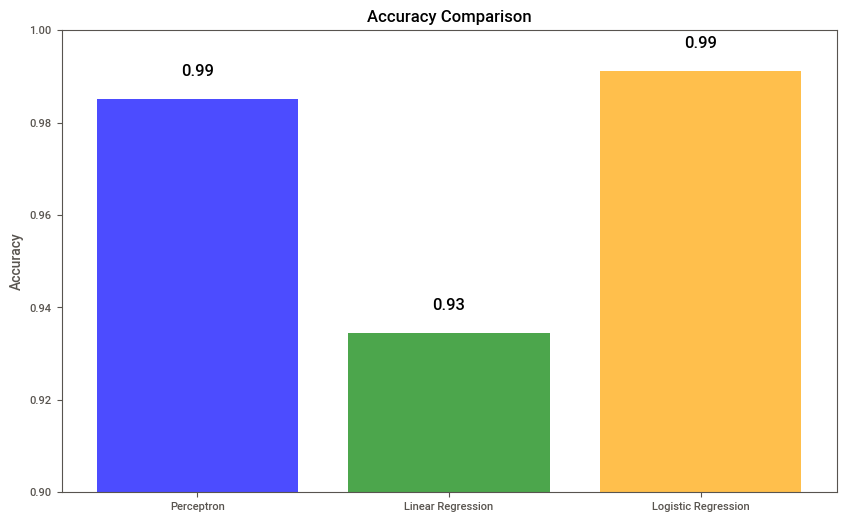

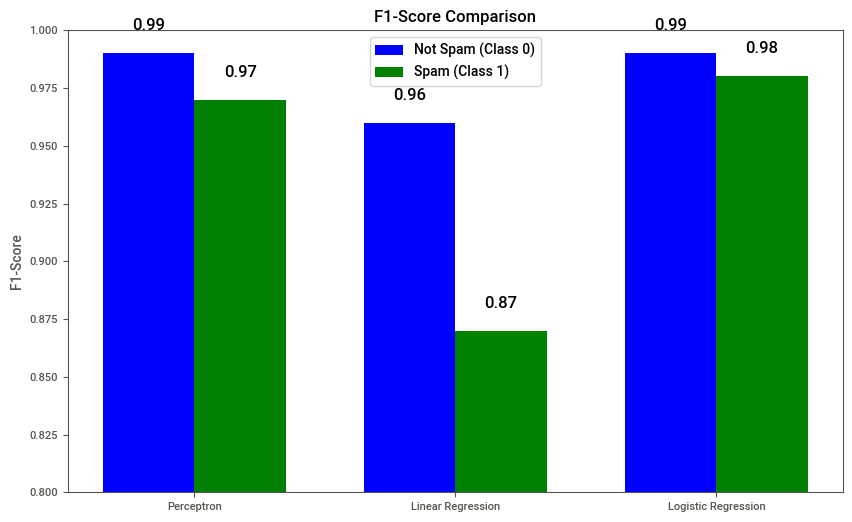

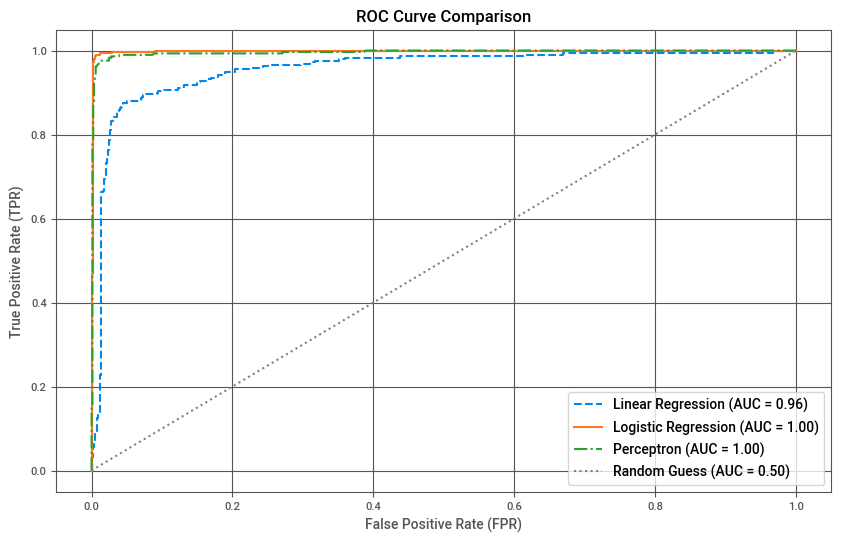

In [32]:
if __name__ == "__main__":
    # Run unit tests first to validate components
    print("Running unit tests...")
    unittest.main(argv=[""], exit=False)

    # If tests pass, proceed to load data and evaluate models
    print("\nAll tests passed! Proceeding with model evaluation...")

    # Load and preprocess data
    X_train_vec, X_test_vec, y_train, y_test, vectorizer = load_and_preprocess_data()

    # Train and evaluate Perceptron Classifier
    perceptron = PerceptronClassifier()
    perceptron.fit(X_train_vec, y_train)
    y_pred_perceptron = perceptron.predict(X_test_vec)
    y_scores_perceptron = perceptron.decision_function(X_test_vec)  # Decision scores for ROC

    # Train and evaluate Linear Regression Classifier
    lr_classifier = LinearRegressionClassifier()
    lr_classifier.fit(X_train_vec, y_train)
    y_scores_linear = lr_classifier.model.predict(X_test_vec)  # Predicted probabilities for ROC

    # Train and evaluate Logistic Regression Perceptron
    log_classifier = LogisticRegressionClassifier()
    log_classifier.fit(X_train_vec, y_train)
    y_scores_logistic = log_classifier.model.predict_proba(X_test_vec)[:, 1]  # Predicted probabilities for ROC

    # Generate predictions for evaluation
    y_pred_linear = np.where(y_scores_linear >= 0.5, 1, 0)
    y_pred_logistic = np.where(y_scores_logistic >= 0.5, 1, 0)

    # Evaluate models
    accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
    report_perceptron = classification_report(y_test, y_pred_perceptron)

    accuracy_linear = accuracy_score(y_test, y_pred_linear)
    report_linear = classification_report(y_test, y_pred_linear)

    accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
    report_logistic = classification_report(y_test, y_pred_logistic)

    # Print evaluation metrics
    print("\nEvaluation Metrics:")
    print("Perceptron Classifier Accuracy:", accuracy_perceptron)
    print("Perceptron Classifier Report:\n", report_perceptron)
    print("Linear Regression Accuracy:", accuracy_linear)
    print("Linear Regression Report:\n", report_linear)
    print("Logistic Regression Accuracy:", accuracy_logistic)
    print("Logistic Regression Report:\n", report_logistic)

    # Visualizations
    models = ["Perceptron", "Linear Regression", "Logistic Regression"]
    accuracies = [accuracy_perceptron, accuracy_linear, accuracy_logistic]

    f1_perceptron = extract_f1_scores(report_perceptron)
    f1_linear = extract_f1_scores(report_linear)
    f1_logistic = extract_f1_scores(report_logistic)

    plot_accuracy(models, accuracies)
    plot_f1_scores(
        models,
        [f1_perceptron[0], f1_linear[0], f1_logistic[0]],  # F1-scores for Non-Spam
        [f1_perceptron[1], f1_linear[1], f1_logistic[1]],  # F1-scores for Spam
    )

    # Plot ROC Curves
    plot_roc_curve(
        y_test, 
        y_scores_linear, 
        y_scores_logistic, 
        y_scores_perceptron  # Include Perceptron decision scores
    )


## References

Jackksoncsie. (2023). Spam email Dataset. https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset/data

GeeksforGeeks. (2023). Logistic Regression using Python. https://www.geeksforgeeks.org/ml-logistic-regression-using-python/

DataCamp. (2024). Python Logistic Regression Tutorial with Sklearn & Scikit. https://www.datacamp.com/tutorial/understanding-logistic-regression-python